Text Sentiment Analysis
Dataset link:https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [17]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [18]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    
    return " ".join(lemmatized_tokens)


In [21]:
# Dataset
data = pd.read_csv('IMDB Dataset.csv')  
data['processed_text'] = data['review'].apply(preprocess_text)




In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['processed_text']).toarray()
# Features and Labels
X = vectorizer.fit_transform(data['processed_text']).toarray()
y = data['sentiment'].apply(lambda x: 1 if x == "positive" else 0)  # Convert sentiments to binary labels.

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# OR Naive Bayes
# model = MultinomialNB()
# model.fit(X_train, y_train)


LogisticRegression()

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8855
Precision: 0.8763045999226904
Recall: 0.8997817027187934
F1-Score: 0.8878879859003231

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [26]:
def predict_sentiment(input_text):
    processed_text = preprocess_text(input_text)
    vectorized_text = vectorizer.transform([processed_text]).toarray()
    prediction = model.predict(vectorized_text)
    return "Positive" if prediction[0] == 1 else "Negative"

# Test the Script
input_text = "The movie was fantastic! I really enjoyed it."
print(predict_sentiment(input_text))


Positive


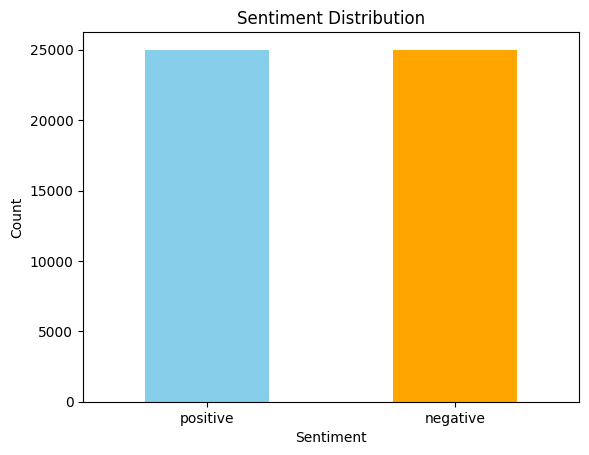

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
data['sentiment'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


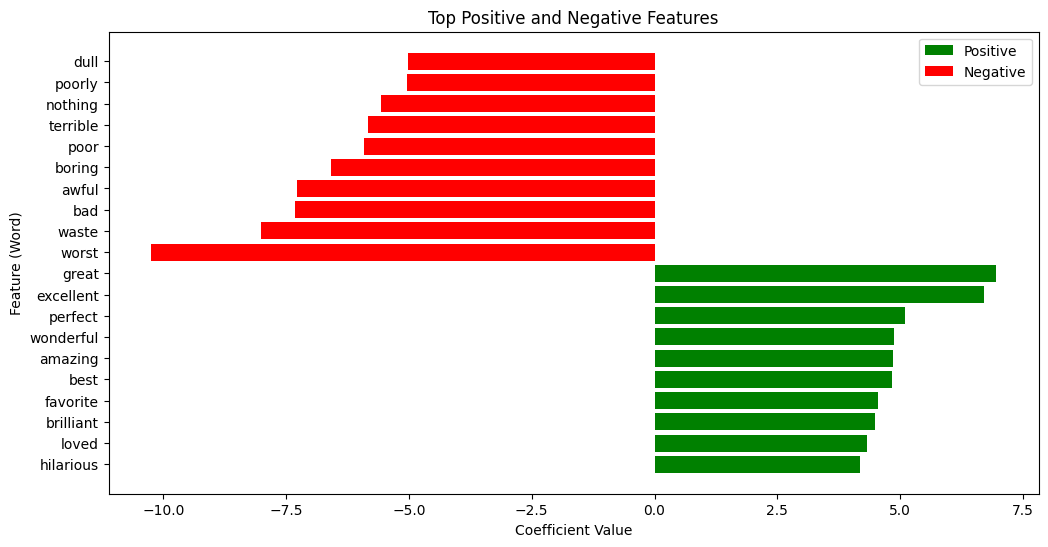

In [30]:
# Get feature names and coefficients
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

# Top positive and negative features
top_positive = np.argsort(coefficients)[-10:]
top_negative = np.argsort(coefficients)[:10]

# Visualization
plt.figure(figsize=(12, 6))
plt.barh([feature_names[i] for i in top_positive], coefficients[top_positive], color='green', label='Positive')
plt.barh([feature_names[i] for i in top_negative], coefficients[top_negative], color='red', label='Negative')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature (Word)")
plt.title("Top Positive and Negative Features")
plt.legend()
plt.show()


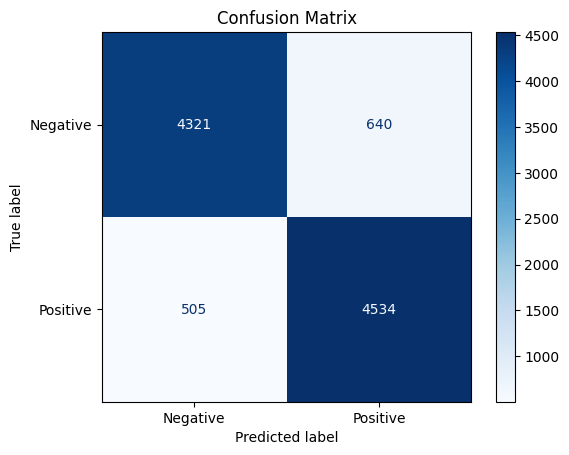

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


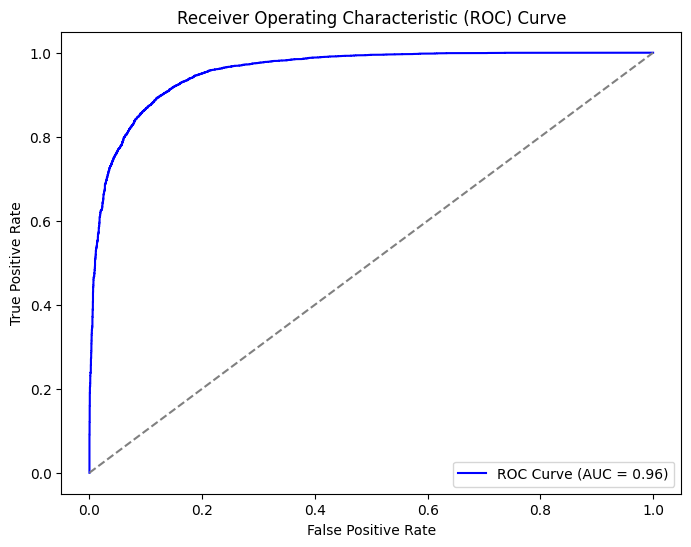

In [32]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()


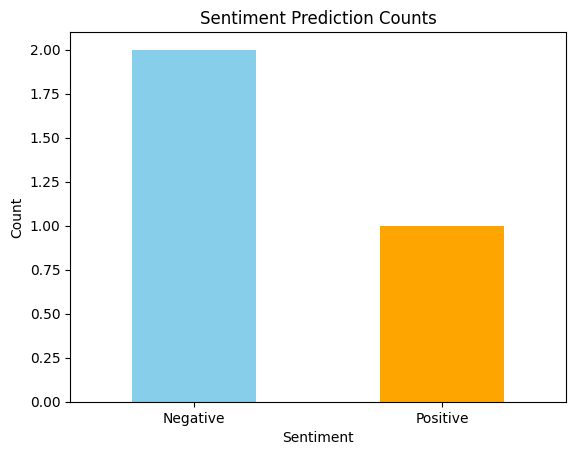

In [33]:
# Example new input data
new_inputs = ["The product was amazing!", "I hated the experience.", "It was okay, nothing special."]
new_predictions = [predict_sentiment(text) for text in new_inputs]

# Count predictions
pred_counts = pd.Series(new_predictions).value_counts()

# Plot prediction counts
pred_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Sentiment Prediction Counts")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10424\3002829594.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='review_length', data=data, palette='coolwarm')


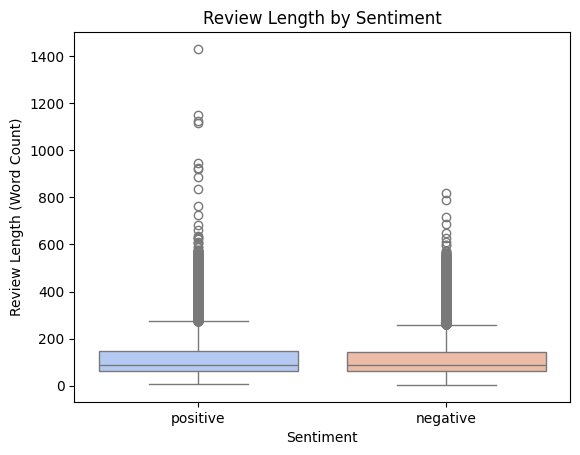

In [34]:

data['review_length'] = data['processed_text'].apply(lambda x: len(x.split()))

sns.boxplot(x='sentiment', y='review_length', data=data, palette='coolwarm')
plt.title("Review Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Review Length (Word Count)")
plt.show()
